In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv(r"D:\downloads\games.csv\game600.csv")  
df.head() 

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,sss
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,sss
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,sss
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,sss
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,sss
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,sss


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              599 non-null    object 
 1   rated           599 non-null    bool   
 2   created_at      599 non-null    float64
 3   last_move_at    599 non-null    float64
 4   turns           599 non-null    int64  
 5   victory_status  599 non-null    object 
 6   winner          599 non-null    object 
 7   increment_code  599 non-null    object 
 8   white_id        599 non-null    object 
 9   white_rating    599 non-null    int64  
 10  black_id        599 non-null    object 
 11  black_rating    599 non-null    int64  
 12  moves           599 non-null    object 
 13  opening_eco     599 non-null    object 
 14  opening_name    599 non-null    object 
 15  opening_ply     599 non-null    int64  
 16  sss             131 non-null    object 
dtypes: bool(1), float64(2), int64(4), o

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,5.990000e+02,5.990000e+02,599.000000,599.000000,599.000000,599.000000
mean,1.499733e+12,1.499733e+12,59.030050,1500.085142,1490.554257,4.858097
std,3.102826e+09,3.102826e+09,33.788132,269.827774,276.943210,2.737372
min,1.440000e+12,1.440000e+12,2.000000,884.000000,886.000000,1.000000
25%,1.500000e+12,1.500000e+12,35.000000,1297.500000,1281.500000,3.000000
50%,1.500000e+12,1.500000e+12,52.000000,1509.000000,1500.000000,5.000000
75%,1.500000e+12,1.500000e+12,77.000000,1680.500000,1676.000000,6.000000
max,1.500000e+12,1.500000e+12,195.000000,2449.000000,2287.000000,19.000000


In [5]:
df.describe(include=['O'])

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name,sss
count,599,599,599,599,599,599,599,599,599,131
unique,599,4,3,67,321,313,599,143,310,1
top,eJgE3AVx,resign,white,10+0,fischerdipper,shivangithegenius,Nf3 c6 Nc3 d5 Ng1 Nf6 Nb1 e5 Nc3 Bd6 Nb1 Bf5 N...,C00,Queen's Pawn Game: Mason Attack,sss
freq,1,352,288,221,22,25,1,30,13,131


In [6]:
df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,sss
count,599,599,5.990000e+02,5.990000e+02,599.000000,599,599,599,599,599.000000,599,599.000000,599,599,599,599.000000,131
unique,599,2,NaN,NaN,NaN,4,3,67,321,NaN,313,NaN,599,143,310,NaN,1
top,eJgE3AVx,True,NaN,NaN,NaN,resign,white,10+0,fischerdipper,NaN,shivangithegenius,NaN,Nf3 c6 Nc3 d5 Ng1 Nf6 Nb1 e5 Nc3 Bd6 Nb1 Bf5 N...,C00,Queen's Pawn Game: Mason Attack,NaN,sss
freq,1,499,NaN,NaN,NaN,352,288,221,22,NaN,25,NaN,1,30,13,NaN,131
mean,NaN,NaN,1.499733e+12,1.499733e+12,59.030050,NaN,NaN,NaN,NaN,1500.085142,NaN,1490.554257,NaN,NaN,NaN,4.858097,NaN
std,NaN,NaN,3.102826e+09,3.102826e+09,33.788132,NaN,NaN,NaN,NaN,269.827774,NaN,276.943210,NaN,NaN,NaN,2.737372,NaN
min,NaN,NaN,1.440000e+12,1.440000e+12,2.000000,NaN,NaN,NaN,NaN,884.000000,NaN,886.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,1.500000e+12,1.500000e+12,35.000000,NaN,NaN,NaN,NaN,1297.500000,NaN,1281.500000,NaN,NaN,NaN,3.000000,NaN
50%,NaN,NaN,1.500000e+12,1.500000e+12,52.000000,NaN,NaN,NaN,NaN,1509.000000,NaN,1500.000000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,1.500000e+12,1.500000e+12,77.000000,NaN,NaN,NaN,NaN,1680.500000,NaN,1676.000000,NaN,NaN,NaN,6.000000,NaN


In [7]:
df.isnull().sum()

id                  0
rated               0
created_at          0
last_move_at        0
turns               0
victory_status      0
winner              0
increment_code      0
white_id            0
white_rating        0
black_id            0
black_rating        0
moves               0
opening_eco         0
opening_name        0
opening_ply         0
sss               468
dtype: int64

In [8]:
df.drop(columns=['sss'])

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,FGUuHBIN,True,1.500000e+12,1.500000e+12,133,mate,white,10+0,roman12342005,1954,aldairrodriguez,1578,e4 g6 d4 Bg7 c4 d6 Nc3 Nf6 Nf3 O-O h3 Nbd7 Be2...,E90,King's Indian Defense: Normal Variation | Rar...,9
595,FfPQwkyj,False,1.500000e+12,1.500000e+12,65,resign,white,5+5,sheshengy,1984,total_chess,2050,e4 c5 Nc3 e6 d3 d5 exd5 exd5 d4 Nc6 Be3 Nf6 Bb...,B23,Sicilian Defense: Closed,4
596,jTvyCsWT,False,1.500000e+12,1.500000e+12,62,mate,black,5+5,total_chess,2050,mr_pablo,1627,Nf3 d5 Nd4 e5 Nf3 e4 Ng1 Bc5 e3 Bf5 d4 Bd6 c4 ...,A06,Reti Opening,2
597,qn5XNlhr,False,1.500000e+12,1.500000e+12,62,resign,black,5+5,mr_pablo,1627,total_chess,2050,e4 e6 d4 Bb4+ Nc3 Bf8 Bd2 Be7 Qf3 Bf8 Bc4 Be7 ...,C00,French Defense: Normal Variation,3


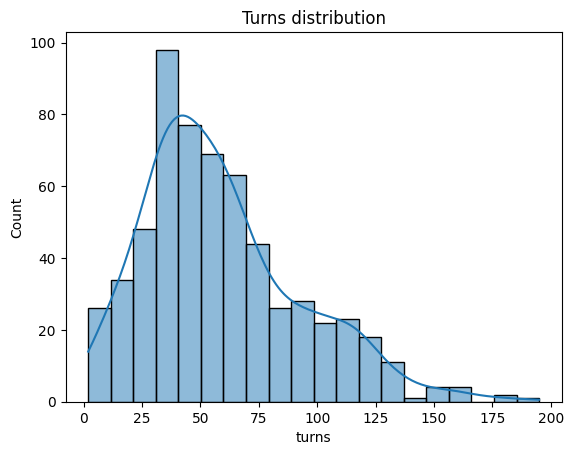

In [9]:
sns.histplot(df['turns'],kde=True)
plt.title('Turns distribution')
plt.show()

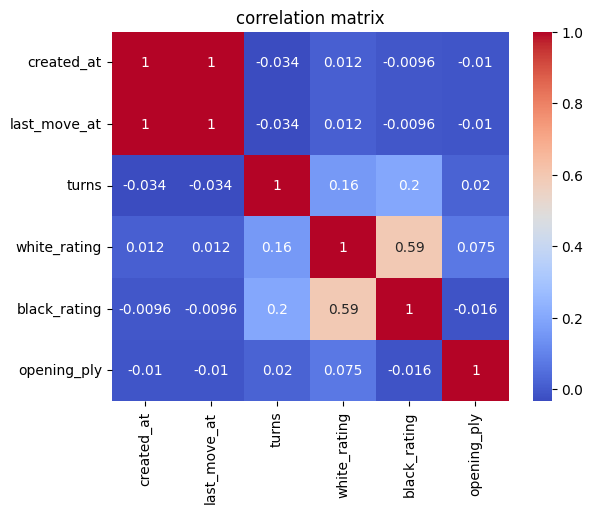

In [10]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.Figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

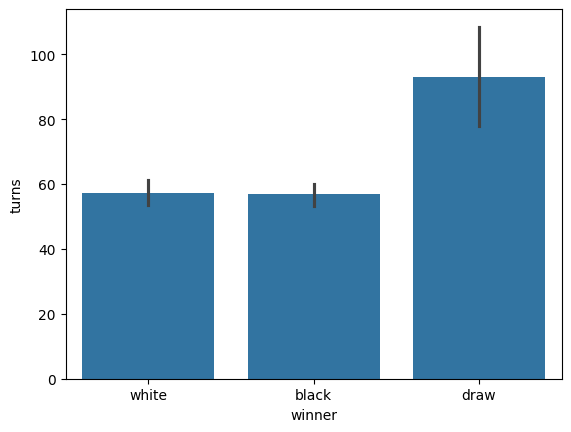

In [11]:
sns.barplot(x="winner", y="turns", data=df)
plt.show()

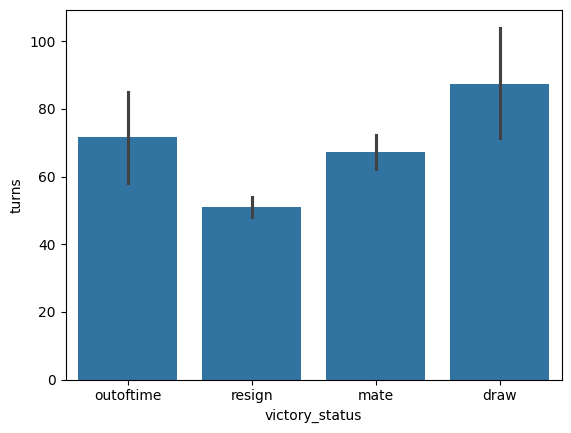

In [12]:
sns.barplot(x="victory_status", y="turns", data=df)
plt.show()

rated
True     499
False    100
Name: count, dtype: int64


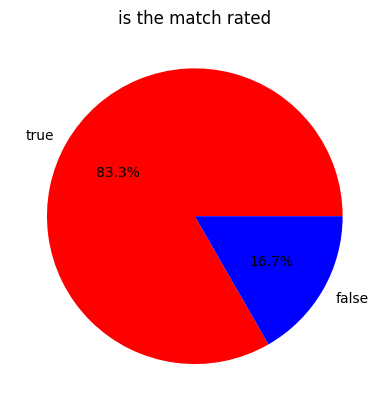

In [13]:
pclass_counts=df['rated'].value_counts()
print(pclass_counts)
plt.pie(pclass_counts,labels=['true','false'],autopct='%1.1f%%' ,colors=['red','blue'])
plt.title('is the match rated')
plt.show()

victory_status
resign       352
mate         176
outoftime     41
draw          30
Name: count, dtype: int64


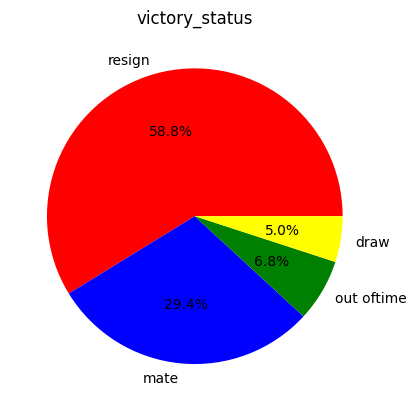

In [14]:
pclass_counts=df['victory_status'].value_counts()
print(pclass_counts)
plt.pie(pclass_counts,labels=['resign','mate','out oftime','draw'],autopct='%1.1f%%' ,colors=['red','blue','green','yellow'])
plt.title('victory_status')
plt.show()

winner
white    288
black    277
draw      34
Name: count, dtype: int64


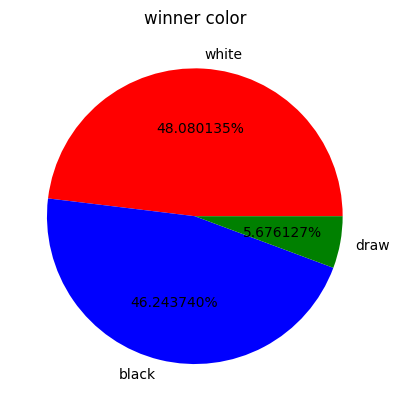

In [15]:
gender_counts=df['winner'].value_counts()
print(gender_counts)
plt.pie(gender_counts,labels=['white','black','draw'],autopct='%1f%%' ,colors=['red','blue','green'])
plt.title('winner color')
plt.show()

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_2228\1986293721.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["victory_status"], y=df["turns"], palette="coolwarm")


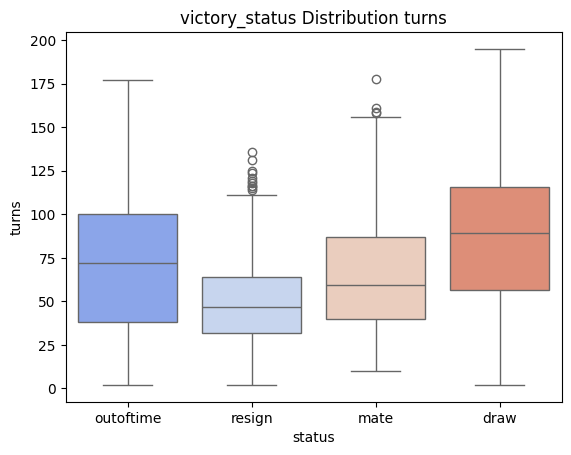

In [17]:
sns.boxplot(x=df["victory_status"], y=df["turns"], palette="coolwarm")
plt.xlabel("status")
plt.ylabel("turns")
plt.title("victory_status Distribution turns")
plt.show()

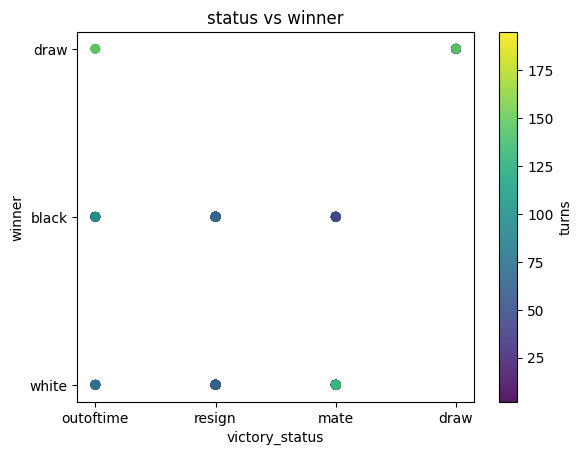

In [18]:
plt.scatter(df['victory_status'],df['winner'],alpha=0.9,c=df['turns'],cmap='viridis')
plt.xlabel('victory_status')
plt.ylabel('winner')
plt.title('status vs winner')
plt.colorbar(label='turns')
plt.show()

In [19]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,sss
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,sss
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,sss
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,sss
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,sss
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,sss


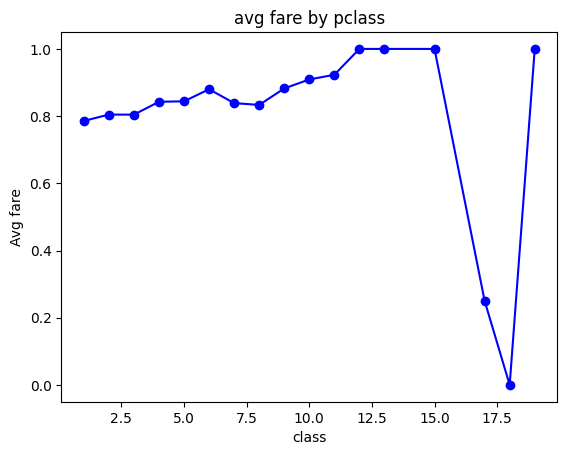

In [20]:
avg_per_class=df.groupby('opening_ply')['rated'].mean()
plt.plot(avg_per_class.index,avg_per_class.values,marker='o',linestyle='-',color='blue')
plt.xlabel('class')
plt.ylabel('Avg fare')
plt.title('avg fare by pclass')
plt.show()